<a href="https://colab.research.google.com/github/rxb993/DS320-B3-Final-Project/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
#load data sets
#games_df = pd.read_csv("/content/drive/My Drive/PSU/Spring 2023/DS 320/DS 320 Project/games.csv")
#recommendations_df = pd.read_csv("/content/drive/My Drive/PSU/Spring 2023/DS 320/DS 320 Project/recommendations.csv")

merged_df = pd.read_csv("/content/drive/My Drive/PSU/Spring 2023/DS 320/DS 320 Project/final.csv")

In [ ]:
#merge two data tables
merged_df = games_df.merge(recommendations_df, on="app_id")

In [ ]:
#drop non-informative columns
merged_df = merged_df.drop(columns=['title', 'app_id'])
merged_df['date_release'] = pd.to_datetime(merged_df['date_release']).apply(lambda x: x.year)
merged_df['date'] = pd.to_datetime(merged_df['date']).apply(lambda x: x.year)

In [ ]:
merged_df = merged_df.loc[:, merged_df.apply(pd.Series.nunique) != 1]

In [ ]:
merged_df.to_csv('final.csv')

In [ ]:
merged_df
merged_df.dropna()
merged_df.isna().sum()
len(merged_df)

data10 = merged_df[['price_final', 'price_original', 'date_release', 'discount', 'linux',
                'mac', 'date', 'user_reviews']]

In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# For only including selected features
h2o.init()

# Remove spaces from column names
data10.columns = [col.replace(" ", "") for col in data10.columns]

# Display the updated column names
print(data10.columns)

# Split dataset into training and testing sets
train_data, test_data = train_test_split(data10, test_size=0.2, random_state=42)

# Convert pandas dataframes to H2O dataframes
h2o_train_data = h2o.H2OFrame(train_data)
h2o_test_data = h2o.H2OFrame(test_data)

# Identify the target column
y = "price_final"
x = train_data.drop(columns=[y]).columns

# Perform feature selection using RFE
rfe_selector = RFE(estimator=LinearRegression(), step=1)
rfe_selector.fit(train_data[x], train_data[y])
selected_features = x[rfe_selector.support_]

# Update the feature list for H2O
x = selected_features.tolist()

# Run H2O AutoML
aml = H2OAutoML(max_models=3, seed=1)
aml.train(x=x, y=y, training_frame=h2o_train_data)

best_model = aml.get_best_model()

lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3fwa4g2h
  JVM stdout: /tmp/tmp3fwa4g2h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3fwa4g2h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,"21 days, 7 hours and 31 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_mmpix6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Index(['price_final', 'price_original', 'date_release', 'discount', 'linux',
       'mac', 'date', 'user_reviews'],
      dtype='object')
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████

In [ ]:
best_model = aml.get_best_model()

lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
XGBoost_1_AutoML_1_20230425_192520                       1.42469   2.02973  0.270911    0.302531                   2.02973
StackedEnsemble_BestOfFamily_1_AutoML_1_20230425_192520  1.42752   2.03781  0.303593    0.30185                    2.03781
GBM_1_AutoML_1_20230425_192520                           1.44587   2.09054  0.360356    0.301335                   2.09054
GLM_1_AutoML_1_20230425_192520                           3.71245  13.7823   1.97783   nan                         13.7823
[4 rows x 6 columns]



In [ ]:
#Compute the Pearson's correlation matrix
correlation_matrix = merged_df.corr()

<ipython-input-12-198c7afa6fc2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

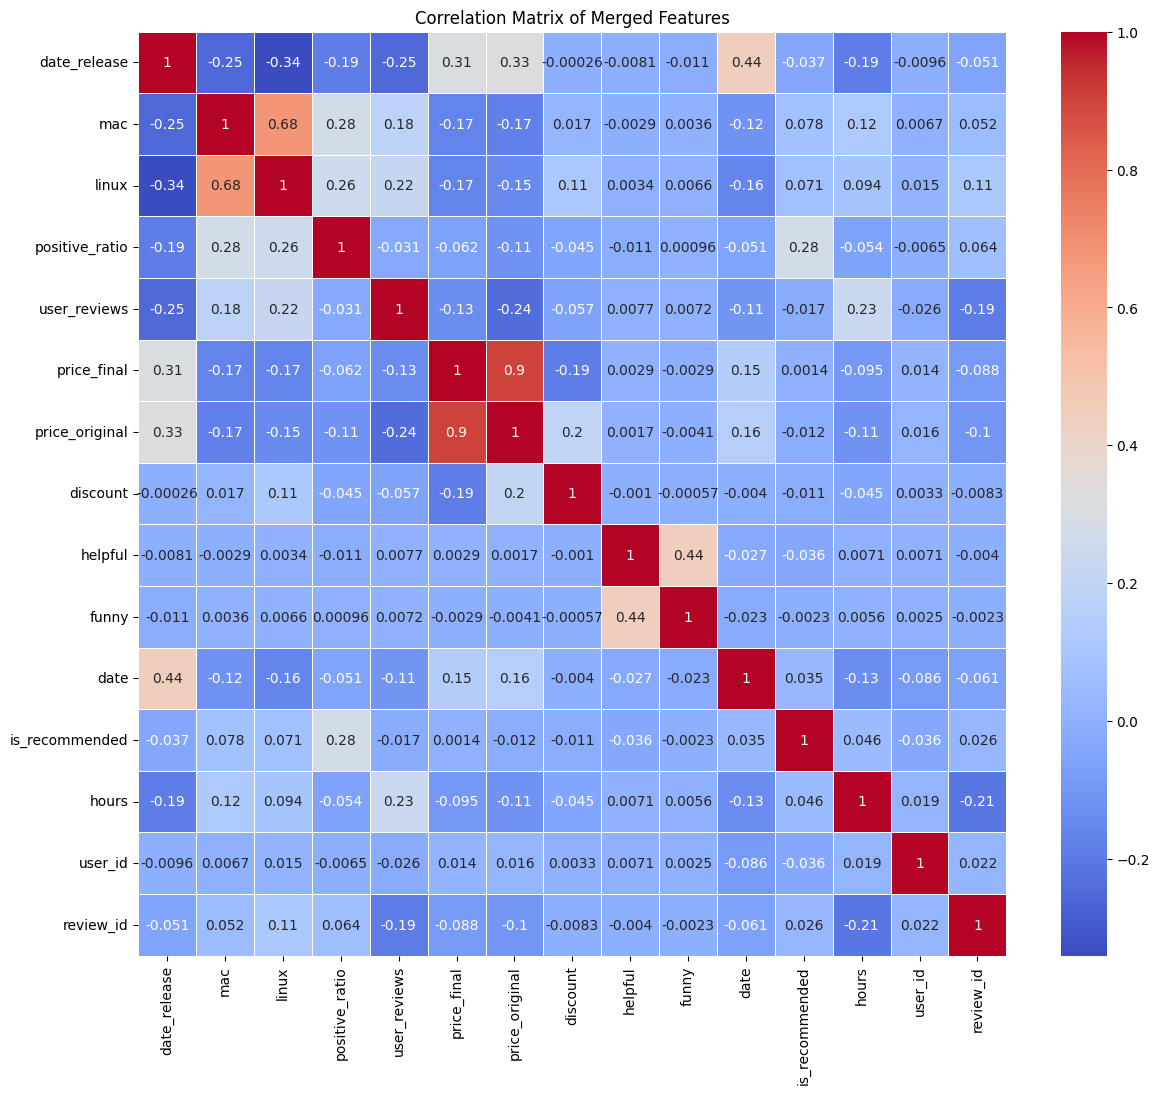

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Merged Features")
plt.show()

- A coefficient close to 1 (warm color) indicates a strong positive linear relationship.
- A coefficient close to -1 (cool color) indicates a strong negative linear relationship.
- A coefficient close to 0 (neutral color) indicates little to no linear relationship.

In [ ]:
graph = nx.Graph(correlation_matrix)

In [ ]:
graph.remove_edges_from(nx.selfloop_edges(graph))

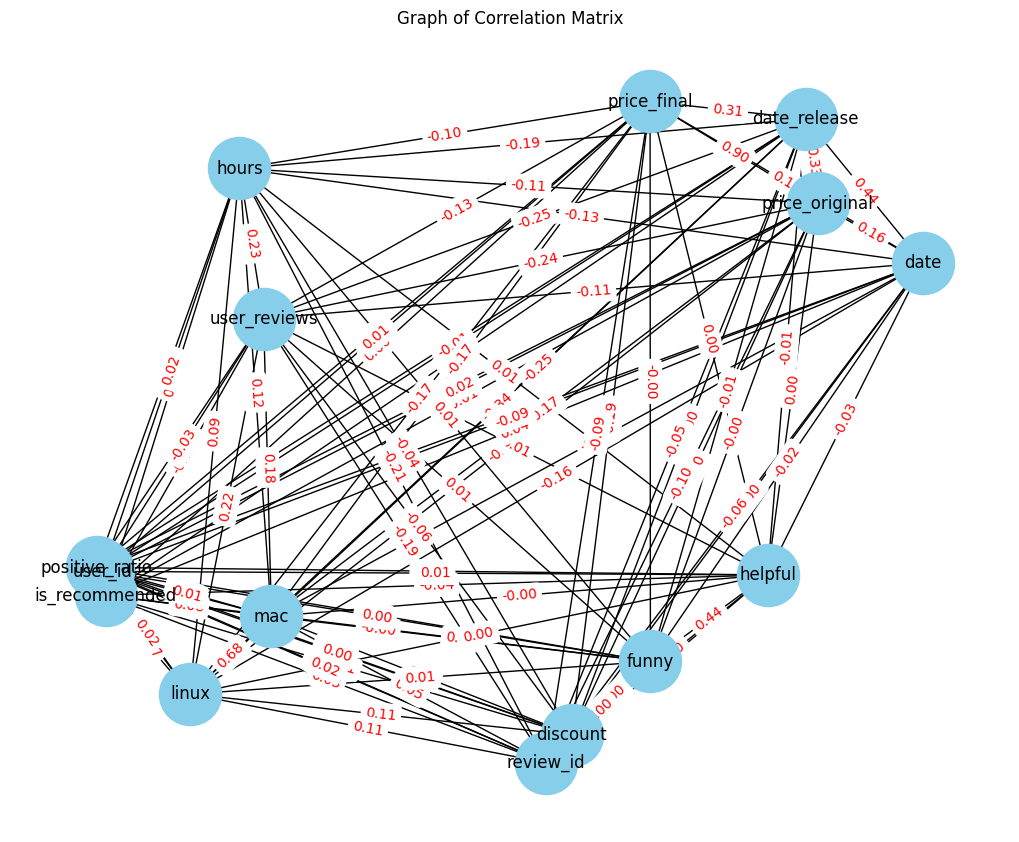

In [ ]:
def draw_graph(graph, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, node_color="skyblue", node_size=2000, with_labels=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}, font_color='red')
    plt.title("Graph of Correlation Matrix")
    plt.show()

draw_graph(graph)

In [ ]:
#Generating least correlated features

def least_correlated_features(graph, target_feature, n_features=5):
    correlations = [(abs(data["weight"]), feature) for feature, data in graph[target_feature].items()]
    correlations.sort()
    return [feature for _, feature in correlations[:n_features]]

target_feature = "price_final"
n_least_correlated_features = 5
least_corr_features = least_correlated_features(graph, target_feature, n_least_correlated_features)

print(f"{n_least_correlated_features} least correlated features to {target_feature}:")
print(least_corr_features)

5 least correlated features to price_final:
['is_recommended', 'helpful', 'funny', 'user_id', 'positive_ratio']


In [ ]:
#Generating top correlated features

def most_correlated_features(graph, target_feature, n_features=5):
    correlations = [(abs(data["weight"]), feature) for feature, data in graph[target_feature].items()]
    correlations.sort(reverse=True)
    return [feature for _, feature in correlations[:n_features]]

target_feature = "price_final"
n_most_correlated_features = 5
most_corr_features = most_correlated_features(graph, target_feature, n_most_correlated_features)

print(f"{n_most_correlated_features} most correlated features to {target_feature}:")
print(most_corr_features)

5 most correlated features to price_final:
['price_original', 'date_release', 'discount', 'linux', 'mac']


In [ ]:
def most_correlated_features(correlation_matrix, target_feature, n_features=10):
    correlations = correlation_matrix[target_feature].drop(target_feature).apply(abs)
    sorted_correlations = correlations.sort_values(ascending=False)
    top_n_correlations = sorted_correlations.head(n_features)
    return top_n_correlations

target_feature = "price_final"
n_most_correlated_features = 10
most_corr_features = most_correlated_features(correlation_matrix, target_feature, n_most_correlated_features)

print(f"{n_most_correlated_features} most correlated features to {target_feature}:")
print(most_corr_features)

10 most correlated features to price_final:
price_original    0.902354
date_release      0.309849
discount          0.187460
linux             0.167588
mac               0.165366
date              0.145392
user_reviews      0.133906
hours             0.095426
review_id         0.088123
positive_ratio    0.062084
Name: price_final, dtype: float64
